<a href="https://colab.research.google.com/github/Biki463/colab-work/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#task 
1.Cleaning
2.Analysis
3.Modelling
4.Review



In [ ]:
#cleaning start 
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
filepath = '/content/train (1).csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
print("Categorical Variables")
categorical_variables = df.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
def get_nulls(df):
    dict_nulls = {}
    for col in  df.columns:
        dict_nulls[col]=df[col].isnull().sum()

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()), 
                            index=list(dict_nulls.keys()), 
                            columns=['#nulls'])
    return df_nulls

get_nulls(df)

,#nulls
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [ ]:
def get_nulls_percentage(df):    
    dict_nulls = {}
    for col in  df.columns:
        percentage_null_values = str(round(df[col].isnull().sum()/len(df),2))+\
        "%"
        dict_nulls[col] = percentage_null_values
    
    df_nulls = pd.DataFrame(data=list(dict_nulls.values()), 
                            index=list(dict_nulls.keys()), 
                            columns=['% nulls'])
    return df_nulls
    
get_nulls_percentage(df)

,% nulls
PassengerId,0.0%
HomePlanet,0.02%
CryoSleep,0.02%
Cabin,0.02%
Destination,0.02%
Age,0.02%
VIP,0.02%
RoomService,0.02%
FoodCourt,0.02%
ShoppingMall,0.02%


In [ ]:
for cat_col in categorical_variables:
    if cat_col!="Name":
        df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])    

In [ ]:
get_nulls_percentage(df)

,% nulls
PassengerId,0.0%
HomePlanet,0.0%
CryoSleep,0.0%
Cabin,0.0%
Destination,0.0%
Age,0.02%
VIP,0.0%
RoomService,0.02%
FoodCourt,0.02%
ShoppingMall,0.02%


In [ ]:
#Analysis
df.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df.describe(include=['O'])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8493
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall
freq,1,4803,207,6097,2


In [ ]:
# Dropping the name column we don't need anymore
df.drop(['Name'], axis=1, inplace=True)

In [ ]:
categorical_variables = df.select_dtypes(include=['object']).columns

In [ ]:
categorical_variables

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], dtype='object')

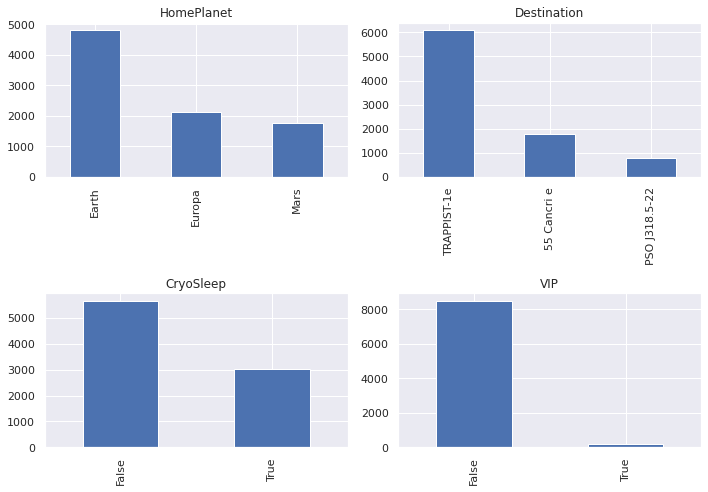

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
df['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
df['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
df['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
df['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout();

In [ ]:
df['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pathlib

In [ ]:
print("Numerical Variables")
numerical_variables = df._get_numeric_data().columns
for col in numerical_variables:
    print(col)


Numerical Variables
CryoSleep
Age
VIP
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [ ]:
numerical_variables = list(numerical_variables)
if "train" in filepath:
    numerical_variables.remove('Transported')

In [ ]:
 df[num_col]

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: bool

# Feature Engineering

1. Build 2 features out of the 'CAbin' column: deck and port

In [ ]:
# building the deck and port features from the 'cabin' column
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Port'] = df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df["Deck"] = df["Deck"].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df["Port"] = df["Port"].map({'P':0, 'S':1}).astype(int)
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [ ]:
df["HomePlanet"] = df["HomePlanet"].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [ ]:
unique_destinations = df["Destination"].unique()
df["Destination"] = df["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [ ]:
df["Destination"].unique()

array([0, 1, 2])

In [ ]:
if 'train' in filepath:
    df.drop(['PassengerId'],axis=1, inplace=True)

In [ ]:
unique_vip = df["VIP"].unique()
df["VIP"] = df["VIP"].map(dict(zip(unique_vip,list(range(len(unique_vip)))))).astype(int)

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,False,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0,False,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,1,False,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,1,False,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0,False,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [ ]:
unique_cryosleep = df["CryoSleep"].unique()
df["CryoSleep"] = df["CryoSleep"].map(dict(zip(unique_cryosleep,list(range(len(unique_cryosleep)))))).astype(int)

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


# Modelling

1. Train test split of our training data
2. Fit a few models: Logistic Regression, Random Forest, Gradient Boosting
3. Plot the results
4. Pick a winner
5. Submit our predictions

In [ ]:
df_test = pd.read_csv("/content/test_cleaned.csv")
df_train = pd.read_csv("/content/train_cleaned.csv")

In [ ]:
# split
X_train = df_train.drop('Transported', axis=1)
y_train = df_train['Transported']
X_test = df_test.drop('PassengerId', axis=1).copy()

In [ ]:
df_train = pd.read_csv("/content/train_cleaned.csv")
# 1. Train Test Split
X = df_train.drop("Transported", axis=1).values
y = df_train["Transported"].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 12), (6954,), (1739, 12), (1739,))

In [ ]:
# 2. Fit a few models: Logistic Regression, Random Forest, Gradient Boosting
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score = lg.score(X_test,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# fitting random forest model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred_score = rf.score(X_test,y_test)

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred_score = gb.score(X_test,y_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred_score = svc.score(X_test,y_test)

In [ ]:
df = pd.DataFrame(dict(model=['Logistic Regression', 
                              'Random Forest', 
                              'Gradient Boosting',
                              'SVM'],accuracy=[lg_pred_score, rf_pred_score, 
                                               gb_pred_score, svc_pred_score]))
df

,model,accuracy
0,Logistic Regression,0.775158
1,Random Forest,0.778608
2,Gradient Boosting,0.785509
3,SVM,0.764807


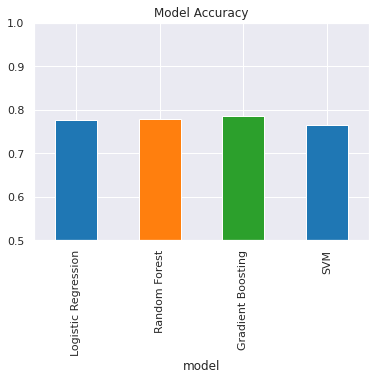

In [ ]:
df.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1);

In [ ]:
# split
X_train = df_train.drop('Transported', axis=1)
y_train = df_train['Transported']
X_test = df_test.drop('PassengerId', axis=1).copy()

In [ ]:
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [ ]:
df.head

<bound method NDFrame.head of                  model  accuracy
0  Logistic Regression  0.775158
1        Random Forest  0.778608
2    Gradient Boosting  0.785509
3                  SVM  0.764807>

In [ ]:
df_submissions = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predictions})
df_submissions.to_csv('/content/submission.csv',index=False)

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"bikikumarsah","key":"d0b15582aefe125e5d6f8b176554ecac"}'}

In [ ]:
!mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list spaceship-titanic


usage: kaggle
       [-h]
       [-v]
       {competitions,c,datasets,d,kernels,k,config}
       ...
kaggle: error: unrecognized arguments: spaceship-titanic


In [ ]:
!kaggle competitions submit -c spaceship-titanic -f /content/submission.csv -m "Submission with Suppoort Vector Machines Model"

100% 56.0k/56.0k [00:00<00:00, 270kB/s]
Successfully submitted to Spaceship Titanic

In [ ]:
!kaggle competitions submit -c spaceship-titanic -f /content/submission.csv -m  "Suppoort Vector Machines Model"

100% 56.0k/56.0k [00:00<00:00, 268kB/s]
Successfully submitted to Spaceship Titanic